In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns

In [2]:
walkSit = pd.read_csv("Data/Transformed/walkSit.csv")
walkFall = pd.read_csv("Data/Transformed/walkFall.csv")
runFall = pd.read_csv("Data/Transformed/runFall.csv")
downSit = pd.read_csv("Data/Transformed/downSit.csv")
freeFall = pd.read_csv("Data/Transformed/freeFall.csv")

## `Some tests to do:`
### 1. `T-Test` (Skip, T-Test is only for 2 groups)
### 2. `ANOVA`
### 3. `Mann–Whitney U-test`
### 4. `Chi-Square` (Skip, our data isn't categorical)

In [3]:
freeFall

,MaxT,MaxX,MaxY,MaxZ,MeanT,MeanX,MeanY,MeanZ,MinT,MinX,MinY,MinZ,StdT,StdX,StdY,StdZ,Fall
0,10.276731,0.127308,0.244415,0.025442,0.153792,-0.153903,0.077502,-0.752157,1.584464e-07,-0.420016,-0.016957,-1.320979,1.184937,0.168736,0.073429,0.408518,1
1,4.529480,0.453281,0.058872,0.013105,0.089589,-0.026507,-0.113502,-0.567422,5.793169e-07,-0.688922,-0.479717,-0.924018,0.531467,0.365920,0.139461,0.313921,1
2,7.615064,1.011155,-0.502108,-0.264318,0.748432,0.654027,-0.780394,-0.826940,7.715176e-04,0.383287,-1.010614,-1.341315,1.217377,0.177158,0.138780,0.302898,1
3,7.459407,0.889441,0.232421,0.384271,0.123185,0.406124,-0.000161,-0.434719,2.176256e-07,0.021448,-0.224895,-1.026440,0.859215,0.265299,0.109664,0.426677,1
4,28.230767,0.144128,1.036386,0.243738,0.418199,-0.060148,0.408805,-0.562707,9.758576e-07,-0.229371,-0.023536,-1.005930,3.255146,0.122816,0.274241,0.409808,1
5,1.839805,1.294721,-0.405960,0.031916,0.264310,0.877575,-0.604684,-0.365890,1.206477e-04,0.562535,-0.806539,-0.748785,0.341617,0.180867,0.128205,0.179902,1
6,7.315368,1.099156,0.065668,0.591942,0.171707,0.337281,-0.322319,-0.235833,1.218265e-05,-0.440895,-1.148096,-0.759660,0.849793,0.436170,0.388097,0.379787,1
7,12.561485,0.637510,2.279155,-0.356160,0.591981,0.318231,0.617298,-0.938816,4.729820e-06,-0.062291,-0.172733,-1.553078,1.984001,0.217952,0.752894,0.276535,1
8,5.559048,1.017646,0.095668,1.028457,0.132941,0.077670,-0.061624,-0.298901,1.094068e-06,-0.359033,-0.226306,-1.571167,0.671269,0.362648,0.110538,0.816028,1
9,78.085862,0.750823,0.033999,0.138857,1.243253,0.245734,-0.220781,-0.544630,1.042771e-06,0.037921,-0.425163,-1.089300,9.042245,0.196202,0.146331,0.467184,1


# Line Plot

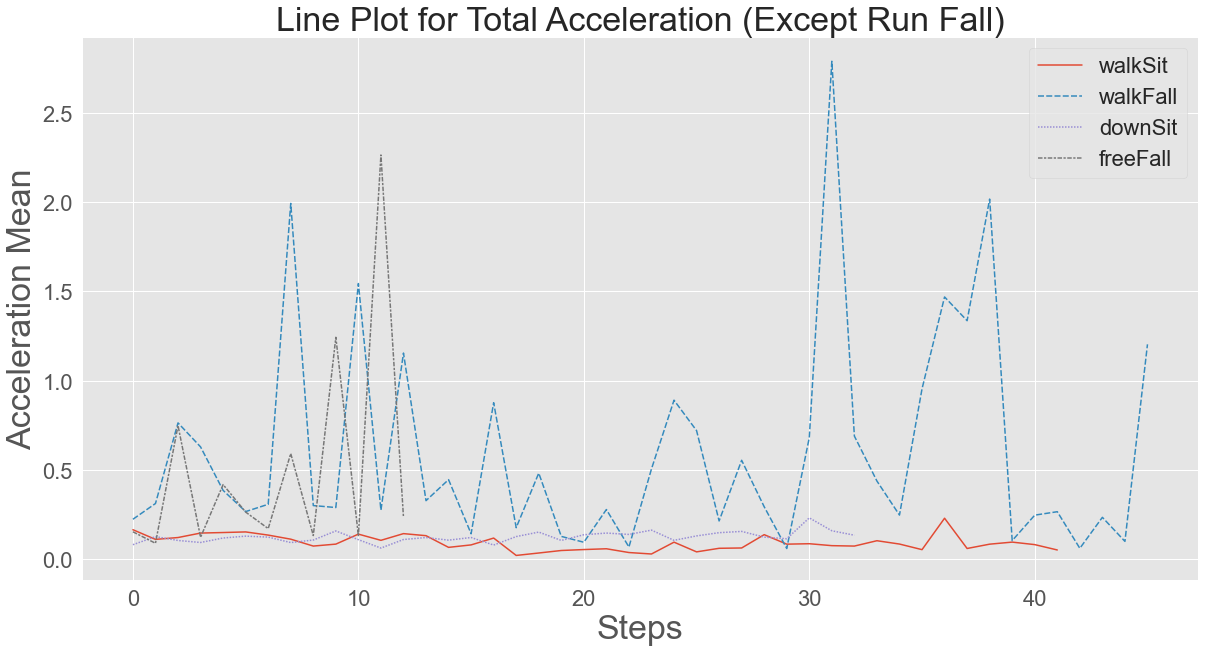

In [31]:
sns.set(font_scale=2)
plt.style.use('ggplot')
data = pd.DataFrame({'walkSit': walkSit['MeanT'], 'walkFall': walkFall['MeanT'], 'downSit': downSit['MeanT'], 'freeFall': freeFall['MeanT']}, columns=["walkSit", "walkFall", "downSit", "freeFall"])
plt.figure(figsize=(20,10))
plt.xlabel('Steps', fontsize=34)
plt.ylabel('Acceleration Mean', fontsize=34)
plt.title('Line Plot for Total Acceleration (Except Run Fall)', fontsize=34)
sns.lineplot(data=data, hue="event")

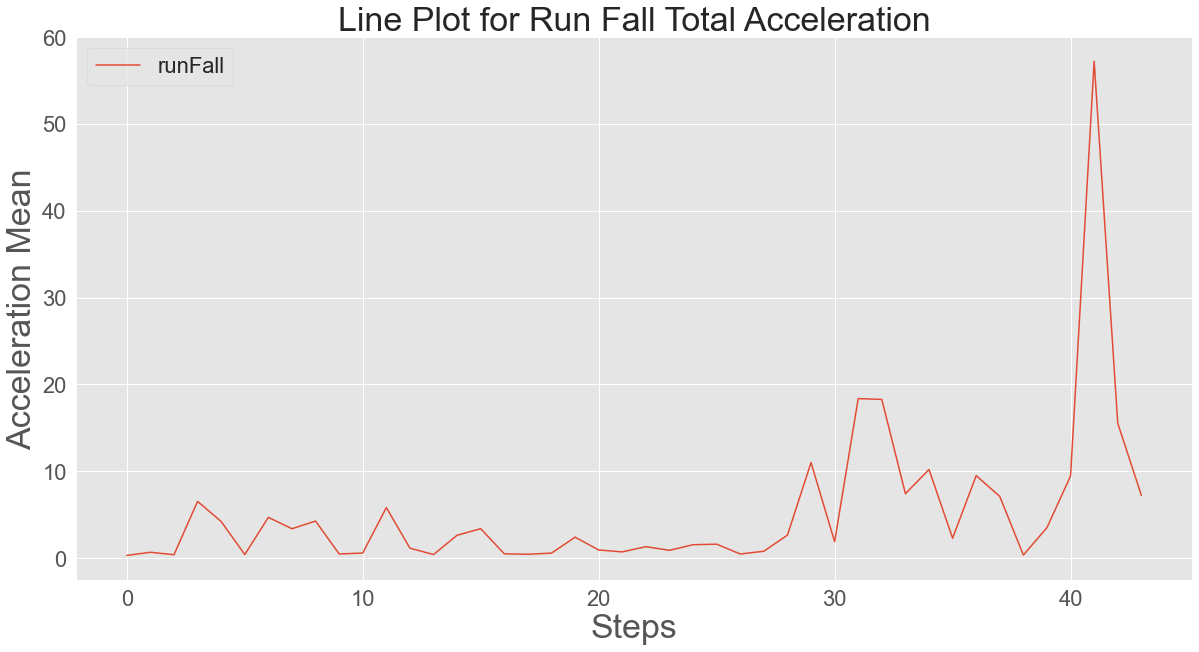

In [32]:
data = pd.DataFrame({'runFall': runFall['MeanT'],}, columns=["runFall"])
plt.figure(figsize=(20,10))
plt.xlabel('Steps', fontsize=34)
plt.ylabel('Acceleration Mean', fontsize=34)
plt.title('Line Plot for Run Fall Total Acceleration', fontsize=34)
sns.lineplot(data=data, hue="event")

# Anova

In [5]:
anova = stats.f_oneway(walkSit['MeanT'], walkFall['MeanT'], runFall['MeanT'], downSit['MeanT'], freeFall['MeanT'])
print(anova)
print(anova.pvalue)

F_onewayResult(statistic=9.581596816657992, pvalue=5.068597522945112e-07)
5.068597522945112e-07


with p-value < 0.05, there is a difference between the means of the groups.

# Post Hoc Analysis

In [6]:
x_data = pd.DataFrame({'walkSit': walkSit['MeanT'], 'walkFall': walkFall['MeanT'], 'runFall':runFall['MeanT'], 'downSit': downSit['MeanT'], 'freeFall': freeFall['MeanT']})
x_melt = pd.melt(x_data).dropna()
posthoc = pairwise_tukeyhsd(
    x_melt['value'], x_melt['variable'],
    alpha=0.05)
print(posthoc)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
 downSit freeFall   0.3802    0.9 -3.8185  4.5789  False
 downSit  runFall   5.1699  0.001  2.2172  8.1227   True
 downSit walkFall   0.4738    0.9 -2.4513  3.3989  False
 downSit  walkSit  -0.0324    0.9 -3.0151  2.9504  False
freeFall  runFall   4.7898 0.0115  0.7421  8.8374   True
freeFall walkFall   0.0936    0.9 -3.9339  4.1212  False
freeFall  walkSit  -0.4126    0.9 -4.4822   3.657  False
 runFall walkFall  -4.6961  0.001    -7.4 -1.9923   True
 runFall  walkSit  -5.2023  0.001 -7.9684 -2.4362   True
walkFall  walkSit  -0.5062    0.9 -3.2427  2.2304  False
--------------------------------------------------------


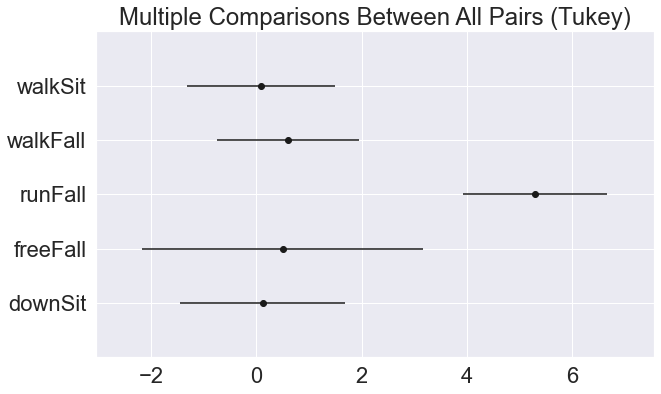

In [7]:
fig = posthoc.plot_simultaneous()

Conclusion: runFall has different means with downSit, freeFall, wallFall and walkSit. For others, we can't tell.

# Mann–Whitney U-test

The Mann–Whitney U-test is a non-parametric test that can be used to decide that samples from one group are larger/​smaller than another. It assumes only two groups with:

- Observations are independent.
- Values are ordinal: can be sorted.

In [8]:
print(stats.mannwhitneyu(walkSit['MeanT'], walkFall['MeanT'], alternative='two-sided').pvalue)

1.6117532504743986e-11


In [9]:
print(stats.mannwhitneyu(walkSit['MeanT'], runFall['MeanT'], alternative='two-sided').pvalue)

1.4821790007565601e-15


In [10]:
print(stats.mannwhitneyu(walkSit['MeanT'], freeFall['MeanT'], alternative='two-sided').pvalue)

9.5244919003122e-06


In [11]:
print(stats.mannwhitneyu(walkSit['MeanT'], downSit['MeanT'], alternative='two-sided').pvalue)

0.00045454111450085935


In [12]:
print(stats.mannwhitneyu(walkFall['MeanT'], runFall['MeanT'], alternative='two-sided').pvalue)

1.3593146644073282e-08


In [13]:
print(stats.mannwhitneyu(walkFall['MeanT'], freeFall['MeanT'], alternative='two-sided').pvalue)

0.2765370717987058


In [14]:
print(stats.mannwhitneyu(walkFall['MeanT'], downSit['MeanT'], alternative='two-sided').pvalue)

3.970802670753198e-08


In [15]:
print(stats.mannwhitneyu(runFall['MeanT'], freeFall['MeanT'], alternative='two-sided').pvalue)

3.244850374379977e-05


In [16]:
print(stats.mannwhitneyu(runFall['MeanT'], downSit['MeanT'], alternative='two-sided').pvalue)

8.149605054262287e-14


In [17]:
print(stats.mannwhitneyu(freeFall['MeanT'], downSit['MeanT'], alternative='two-sided').pvalue)

0.0006963798517894509


Conclusion: except for walkFall and freeFall, we reject the null hypothesis that the medians of the two samples are identical for all other tests since their p-values < 0.05.